<a href="https://colab.research.google.com/github/sara87821/machine_learning/blob/main/MLP(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [47]:
print("訓練資料筆數：",len(y_train))
print("測試資料筆數：",len(y_test))

訓練資料筆數： 60000
測試資料筆數： 10000


In [48]:
print("特徵的維度：",x_train.shape)

特徵的維度： (60000, 28, 28)


In [49]:
pd.DataFrame(x_train[0])
#可以看到是一個32*32的矩陣->標準化

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [50]:
from keras.utils import np_utils
#reshape 32*32到784的一維陣列除以255使他到0~1之間
x_train_shaped=x_train.reshape(60000,784).astype("float32")/255
x_test_shaped=x_test.reshape(10000,784).astype("float32")/255
#keras要求輸出必須轉換成One-hot模式
y_train_cat=np_utils.to_categorical(y_train)
y_test_cat=np_utils.to_categorical(y_test)

In [51]:
print("One-hot 前：",y_train[0])
print("One-hot 後：",y_train_cat[0])
#答案預處理

One-hot 前： 5
One-hot 後： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [52]:
from keras.models import sequential
from keras.layers import Dense
model = Sequential()
h_layer = Dense(units=256,input_dim=784,kernel_initializer="random_normal",activation="relu")
model.add(h_layer)
o_layer = Dense(units=10,kernel_initializer="random_normal",activation="softmax")
model.add(o_layer)

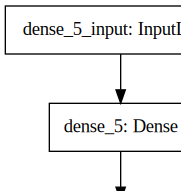

In [53]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [56]:
train_history=model.fit(x=x_train_shaped,y=y_train_cat,
                        validation_split=0.1,
                        epochs=10,
                        batch_size=200,
                        verbose=2)

Epoch 1/10
270/270 - 2s - loss: 0.4158 - accuracy: 0.8890 - val_loss: 0.1771 - val_accuracy: 0.9513
Epoch 2/10
270/270 - 2s - loss: 0.1771 - accuracy: 0.9493 - val_loss: 0.1241 - val_accuracy: 0.9662
Epoch 3/10
270/270 - 2s - loss: 0.1246 - accuracy: 0.9647 - val_loss: 0.1030 - val_accuracy: 0.9713
Epoch 4/10
270/270 - 2s - loss: 0.0945 - accuracy: 0.9735 - val_loss: 0.0911 - val_accuracy: 0.9765
Epoch 5/10
270/270 - 2s - loss: 0.0747 - accuracy: 0.9789 - val_loss: 0.0815 - val_accuracy: 0.9765
Epoch 6/10
270/270 - 2s - loss: 0.0604 - accuracy: 0.9831 - val_loss: 0.0730 - val_accuracy: 0.9795
Epoch 7/10
270/270 - 1s - loss: 0.0501 - accuracy: 0.9858 - val_loss: 0.0726 - val_accuracy: 0.9783
Epoch 8/10
270/270 - 2s - loss: 0.0404 - accuracy: 0.9889 - val_loss: 0.0719 - val_accuracy: 0.9803
Epoch 9/10
270/270 - 2s - loss: 0.0335 - accuracy: 0.9910 - val_loss: 0.0757 - val_accuracy: 0.9792
Epoch 10/10
270/270 - 2s - loss: 0.0278 - accuracy: 0.9930 - val_loss: 0.0679 - val_accuracy: 0.9815

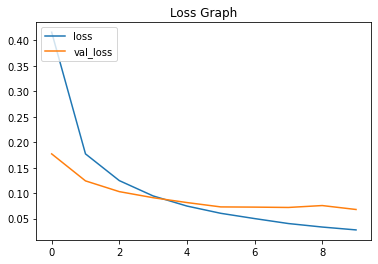

In [57]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss','val_loss'],loc="upper left")

In [58]:
pre = model.predict_classes(x_test_shaped)
print("預測標籤：",list(pre[:5]))
print("正確標籤：",list(y_test)[:5])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


預測標籤： [7, 2, 1, 0, 4]
正確標籤： [7, 2, 1, 0, 4]


In [59]:
e=model.evaluate(x_test_shaped,y_test_cat)
print("衡量係數：",e)
print("正確率：",e[1]*100,"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9783
衡量係數： [0.07040965557098389, 0.9782999753952026]
正確率： 97.82999753952026 %


In [60]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2,3,4,5,6,7,8,9
0,973,0,1,1,2,1,0,1,1,0
1,0,1126,4,0,0,1,2,0,2,0
2,6,1,1007,1,2,0,1,6,7,1
3,1,0,2,994,0,1,0,6,4,2
4,1,0,2,1,961,0,3,2,0,12
5,2,0,0,9,1,869,3,1,4,3
6,10,3,4,1,2,7,928,0,3,0
7,1,4,10,2,0,0,0,1005,1,5
8,7,0,2,6,2,6,1,3,944,3
9,3,5,0,6,9,4,0,4,2,976
